In [107]:
import pandas as pd
import matplotlib.pyplot as plt


In [108]:
from datetime import timedelta

In [109]:
events = pd.read_csv('events.csv')
installs = pd.read_csv('installs.csv')

/home/martinrosas/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (12,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [110]:
#busco si hay alguna relacion entre evento e install
#es una instalacion un evento?
#hay un patron de eventos previos a la instalacion?


In [111]:
#puede haber mas de un install para un ref hash?
#vemos que la gran mayoria tienen solo 1 install
installs.groupby(["ref_hash"]).count()["created"].value_counts()

1    2629
2     356
3      21
4       2
Name: created, dtype: int64

In [112]:
#junto installs y events y convierto
#tambien creo nueva columna para ver la diferencia de tiempo entre eventos e instalacion
events_installs = events.merge(installs, on="ref_hash", how="inner")
events_installs["date"] = pd.to_datetime(events_installs["date"])
events_installs["created"] = pd.to_datetime(events_installs["created"])
events_installs['event_install_delta'] = (events_installs.date - events_installs.created)

In [113]:
#pudimos mergear 53157 filas

In [114]:
events_installs.shape

(53157, 40)

In [115]:
#pero hay que ver por cada install cuantos eventos hubo

In [116]:
#algunos casos tienen muchismos eventos por instalacion
events_installs["ref_hash"].value_counts().head()

3272750442824629569    3804
5517347051664000025    1696
3816297129738440699    1288
1688171320462340261    1256
973455336199876331      893
Name: ref_hash, dtype: int64

In [117]:
#busquemos casos con menos eventos para poder analizar mas comodamente
events_installs["ref_hash"].value_counts()[240:255]

9168281429540286244    39
8525312051407599510    39
1099416989433488717    39
8527604787383141398    39
7796605824867175329    39
8735836123417337347    39
5838075190630496098    39
3379048624467743523    39
932077630707827878     39
8556062440603295870    38
3555281314719408539    38
4487853432814042975    38
8317150186907675790    38
5152529264026804406    38
7138844938300812761    38
Name: ref_hash, dtype: int64

In [118]:
events_installs["ref_hash"].value_counts()[400:420]

6845037217675131758    28
2071738157451677767    28
7320573886575734140    28
3669878150775083010    28
8947591389357963511    28
4143283144026585511    28
7268796360514441238    28
7417822407482261471    27
6060683872408318039    27
2204156414763118594    27
2808800821029079796    27
4842920655031550505    27
1416601277953245608    27
2908949234038448252    27
4190874602193582646    27
4603142710878547974    27
3825524615010901958    27
3997915214730909865    27
4584182785584272504    27
4808380625474100800    27
Name: ref_hash, dtype: int64

In [119]:
installs[installs["ref_hash"] == 1688171320462340261]

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
1081,2019-03-05 00:17:46.709,10,1891515180541284343,1688171320462340261,NaN,False,False,6333597102633388268,3.083059e+17,1.148522e+18,http-kit/2.0,Dalvik/2.1.0 (Linux; U; Android 8.1.0; SM-J410...,NaN,NaN,True,NaN,8531002764348621869,9.028383e+18
2212,2019-03-06 23:00:42.859,16,1891515180541284343,1688171320462340261,NaN,False,False,6333597102633388268,3.083059e+17,1.148522e+18,http-kit/2.0,Dalvik/2.1.0 (Linux; U; Android 8.1.0; SM-J410...,NaN,NaN,True,NaN,8531002764348621869,9.028383e+18


In [120]:
#date es de events y created es de installs 

In [121]:
events_installs_dates = events_installs[["ref_hash", "date", "created", "event_install_delta", "event_id"]]
events_installs_dates.head(10)

,ref_hash,date,created,event_install_delta,event_id
0,5007008548832677915,2019-03-10 18:28:09.696,2019-03-09 22:32:48.032,0 days 19:55:21.664000,1
1,5007008548832677915,2019-03-10 18:28:30.550,2019-03-09 22:32:48.032,0 days 19:55:42.518000,33
2,5007008548832677915,2019-03-11 15:39:41.486,2019-03-09 22:32:48.032,1 days 17:06:53.454000,1
3,5007008548832677915,2019-03-11 15:40:36.377,2019-03-09 22:32:48.032,1 days 17:07:48.345000,33
4,5007008548832677915,2019-03-11 15:39:20.750,2019-03-09 22:32:48.032,1 days 17:06:32.718000,33
5,5007008548832677915,2019-03-09 22:33:32.533,2019-03-09 22:32:48.032,0 days 00:00:44.501000,22
6,5007008548832677915,2019-03-09 22:32:51.465,2019-03-09 22:32:48.032,0 days 00:00:03.433000,22
7,5007008548832677915,2019-03-09 22:32:54.805,2019-03-09 22:32:48.032,0 days 00:00:06.773000,22
8,5007008548832677915,2019-03-09 01:21:02.008,2019-03-09 22:32:48.032,-1 days +02:48:13.976000,33
9,5007008548832677915,2019-03-09 01:41:51.713,2019-03-09 22:32:48.032,-1 days +03:09:03.681000,33


In [122]:
#analizamos un caso con 19 eventos. hubo solo 1 install
#en la filas 5,6,y 7 los dates parecen coincidir en el tiempo donde fue isntalado (created)
#ninguno es exacto, pero los 3 tienen de event id al 22.
#¿el install es el evento 22?
#los ordeno por fecha del evento para comparar

#todas las secuencias de eventos parecen arrancar con el ID 1, y continuan con el 33
#sera 1 el evento que se entra a la publicidad?

In [123]:
events_installs_dates[events_installs_dates["ref_hash"] == 5007008548832677915].sort_values(by="date")

,ref_hash,date,created,event_install_delta,event_id
16,5007008548832677915,2019-03-09 00:16:30.922,2019-03-09 22:32:48.032,-1 days +01:43:42.890000,1
15,5007008548832677915,2019-03-09 00:16:50.492,2019-03-09 22:32:48.032,-1 days +01:44:02.460000,33
13,5007008548832677915,2019-03-09 01:05:40.107,2019-03-09 22:32:48.032,-1 days +02:32:52.075000,1
12,5007008548832677915,2019-03-09 01:06:05.959,2019-03-09 22:32:48.032,-1 days +02:33:17.927000,33
14,5007008548832677915,2019-03-09 01:20:40.774,2019-03-09 22:32:48.032,-1 days +02:47:52.742000,33
8,5007008548832677915,2019-03-09 01:21:02.008,2019-03-09 22:32:48.032,-1 days +02:48:13.976000,33
11,5007008548832677915,2019-03-09 01:22:01.076,2019-03-09 22:32:48.032,-1 days +02:49:13.044000,33
10,5007008548832677915,2019-03-09 01:40:38.844,2019-03-09 22:32:48.032,-1 days +03:07:50.812000,33
9,5007008548832677915,2019-03-09 01:41:51.713,2019-03-09 22:32:48.032,-1 days +03:09:03.681000,33
17,5007008548832677915,2019-03-09 02:30:11.598,2019-03-09 22:32:48.032,-1 days +03:57:23.566000,1


In [124]:
#analizamos con otro ref hash
#9137998220583496972 tiene 71 eventos
#nuevamente el evento 33 es el mas comun 
#miramos los ultimos 10 porque son los mas cercanos a la instalacion
#mirando las diferencias de tiempo , parece ser que el evento 1 sigue siendo el principio de cada secuencia de eventos
#cada vez que hay un evento 1, el evento anterior en tiempo es lejano, asi que debe ser otra "sesion"
#excepto por el caso de la fila 24, que arranca con 80. hay que ver otros casos similares

In [125]:
events_installs_dates[events_installs_dates["ref_hash"] == 9137998220583496972].sort_values(by="date").tail(10)

,ref_hash,date,created,event_install_delta,event_id
76,9137998220583496972,2019-03-09 00:30:14.782,2019-03-10 03:25:06.939,-2 days +21:05:07.843000,33
88,9137998220583496972,2019-03-09 02:51:17.796,2019-03-10 03:25:06.939,-2 days +23:26:10.857000,1
87,9137998220583496972,2019-03-09 02:59:14.847,2019-03-10 03:25:06.939,-2 days +23:34:07.908000,33
89,9137998220583496972,2019-03-09 03:00:24.740,2019-03-10 03:25:06.939,-2 days +23:35:17.801000,33
24,9137998220583496972,2019-03-10 03:25:08.572,2019-03-10 03:25:06.939,0 days 00:00:01.633000,80
23,9137998220583496972,2019-03-10 03:25:10.077,2019-03-10 03:25:06.939,0 days 00:00:03.138000,80
22,9137998220583496972,2019-03-10 03:25:13.866,2019-03-10 03:25:06.939,0 days 00:00:06.927000,81
21,9137998220583496972,2019-03-10 13:07:41.761,2019-03-10 03:25:06.939,0 days 09:42:34.822000,80
19,9137998220583496972,2019-03-10 18:04:47.323,2019-03-10 03:25:06.939,0 days 14:39:40.384000,1
20,9137998220583496972,2019-03-10 19:10:49.349,2019-03-10 03:25:06.939,0 days 15:45:42.410000,1


In [126]:
#en este caso todos los eventos son 22, pero parecen corresponder a la misma sesion

In [127]:
events_installs_dates[events_installs_dates["ref_hash"] == 3825524615010901958].sort_values(by="date")

,ref_hash,date,created,event_install_delta,event_id
48089,3825524615010901958,2019-03-12 01:54:10.514,2019-03-12 01:54:06.304,00:00:04.210000,22
48087,3825524615010901958,2019-03-12 01:54:11.269,2019-03-12 01:54:06.304,00:00:04.965000,22
48086,3825524615010901958,2019-03-12 01:54:31.001,2019-03-12 01:54:06.304,00:00:24.697000,22
48085,3825524615010901958,2019-03-12 01:55:36.241,2019-03-12 01:54:06.304,00:01:29.937000,22
48088,3825524615010901958,2019-03-12 01:56:14.262,2019-03-12 01:54:06.304,00:02:07.958000,22
48084,3825524615010901958,2019-03-12 02:05:03.640,2019-03-12 01:54:06.304,00:10:57.336000,22
48082,3825524615010901958,2019-03-12 02:05:47.472,2019-03-12 01:54:06.304,00:11:41.168000,22
48078,3825524615010901958,2019-03-12 02:07:49.397,2019-03-12 01:54:06.304,00:13:43.093000,22
48083,3825524615010901958,2019-03-12 02:11:30.648,2019-03-12 01:54:06.304,00:17:24.344000,22
48077,3825524615010901958,2019-03-12 02:19:20.824,2019-03-12 01:54:06.304,00:25:14.520000,22


In [128]:
#en este caso no se arranca la sesion con evento 1 sino con el 80.
#el evento 22 vuelve a parecer ser el de la instalacion
events_installs_dates[events_installs_dates["ref_hash"] == 2808800821029079796].sort_values(by="date")

,ref_hash,date,created,event_install_delta,event_id
44687,2808800821029079796,2019-03-07 20:12:21.168,2019-03-10 14:21:05.625,-3 days +05:51:15.543000,80
44686,2808800821029079796,2019-03-07 20:12:25.070,2019-03-10 14:21:05.625,-3 days +05:51:19.445000,80
44685,2808800821029079796,2019-03-07 20:12:42.700,2019-03-10 14:21:05.625,-3 days +05:51:37.075000,1
44678,2808800821029079796,2019-03-07 20:12:54.580,2019-03-10 14:21:05.625,-3 days +05:51:48.955000,81
44682,2808800821029079796,2019-03-07 20:13:47.690,2019-03-10 14:21:05.625,-3 days +05:52:42.065000,83
44688,2808800821029079796,2019-03-07 20:14:26.765,2019-03-10 14:21:05.625,-3 days +05:53:21.140000,86
44680,2808800821029079796,2019-03-07 20:14:48.648,2019-03-10 14:21:05.625,-3 days +05:53:43.023000,118
44679,2808800821029079796,2019-03-07 20:14:58.111,2019-03-10 14:21:05.625,-3 days +05:53:52.486000,118
44689,2808800821029079796,2019-03-07 20:15:16.450,2019-03-10 14:21:05.625,-3 days +05:54:10.825000,118
44681,2808800821029079796,2019-03-07 20:16:05.916,2019-03-10 14:21:05.625,-3 days +05:55:00.291000,83


In [129]:
#cuales son los eventos mas comunes?

events_installs["event_id"].value_counts().head(10)

22     17696
31      5756
80      3120
138     3039
81      2464
1       2385
171     2272
513     1726
82      1634
89      1097
Name: event_id, dtype: int64

In [130]:
#Miremos los event id mas comunes ,en un rango de 1 minuto desde la instalacion hacia atras

In [131]:
from datetime import timedelta
ten_minutes_delta = timedelta(minutes=10)
half_hour_delta = timedelta(minutes=30)
two_hour_delta = timedelta(minutes=120)
five_hour_delta = timedelta(minutes=300)
one_day_delta = timedelta(days=1)

In [132]:
events_installs_dates[events_installs_dates["event_install_delta"] < half_hour_delta].head()

,ref_hash,date,created,event_install_delta,event_id
5,5007008548832677915,2019-03-09 22:33:32.533,2019-03-09 22:32:48.032,00:00:44.501000,22
6,5007008548832677915,2019-03-09 22:32:51.465,2019-03-09 22:32:48.032,00:00:03.433000,22
7,5007008548832677915,2019-03-09 22:32:54.805,2019-03-09 22:32:48.032,00:00:06.773000,22
8,5007008548832677915,2019-03-09 01:21:02.008,2019-03-09 22:32:48.032,-1 days +02:48:13.976000,33
9,5007008548832677915,2019-03-09 01:41:51.713,2019-03-09 22:32:48.032,-1 days +03:09:03.681000,33


In [133]:
#miro en distintas distancias de tiempo desde la instalacion

In [134]:
#los 10 minuots mas cercanos a la instalacion tienen gran mayoria de eventos 22
#aparece mucho el evento 138 

In [135]:
events_installs_dates[events_installs_dates["event_install_delta"] < ten_minutes_delta]["event_id"].value_counts().head()

22     8154
138    2291
80     1615
31     1455
81     1303
Name: event_id, dtype: int64

In [136]:
#si agrando a media hora mas cercana, la cantidad de eventos nro 138 es la misma casi
#pero crece mucho el evento 22

In [137]:
events_installs_dates[events_installs_dates["event_install_delta"] < half_hour_delta]["event_id"].value_counts().head()

22     9580
138    2297
31     1792
80     1702
81     1374
Name: event_id, dtype: int64

In [138]:
#miro los eventos mas comunes con mas de 2 horas de diferencia con la instalacion
#el porcentaje de eventos 22 es menor, pero sigue siendo la mayoria
#desaparece el evento 138

In [139]:
events_installs_dates[events_installs_dates["event_install_delta"] > two_hour_delta]["event_id"].value_counts().head()

22     6741
31     3721
171    1697
1      1458
80     1260
Name: event_id, dtype: int64

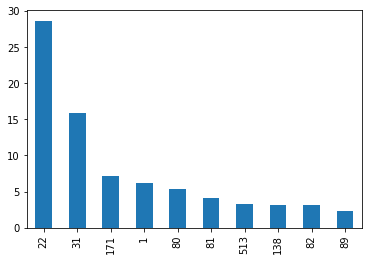

In [140]:
two_hour_delta_percentages = events_installs_dates[events_installs_dates["event_install_delta"] > two_hour_delta]["event_id"].value_counts(normalize=True)*100
two_hour_delta_percentages[:10].plot(kind="bar")

In [141]:
#con 5 horas o mas de diferencia el evento 22 sigue sienod el principal pero su porcentaje respecto al resto sigue bajando

In [142]:
events_installs_dates[events_installs_dates["event_install_delta"] > five_hour_delta]["event_id"].value_counts().head()

22     5810
31     3403
171    1404
1      1324
80     1146
Name: event_id, dtype: int64

In [143]:
#con 1 dia o mas es lo mismo que con 5 horas o mas

In [144]:
events_installs_dates[events_installs_dates["event_install_delta"] > one_day_delta]["event_id"].value_counts().head()

22     4054
31     2477
1       952
171     846
80      797
Name: event_id, dtype: int64

In [145]:
#al ser el 138 un evento que solo aparece bien cerca del momento de instalacion, y el 22 
#un evento que aparece en proporcion muchisimo mas cuando mas nos acercamos a la instalacion
#tal vez el evento 22 sea un paso previo muy cercano a la instalacion
#y el evento 138 sea la instalacion en si. no creo que sea casualidad que la cantidad total
#de eventos 138 tenga una cifra muy cercana al tamaño en filas del csv de installs
#hay que seguir analizando

In [146]:
#y si la el event id  para un determinado evento es distinto entre distintas apps?
#podemos analizar lo mismo filtrando por aplicacion

In [147]:
#miremos las 10 apps con mas eventos

In [148]:
events_installs.groupby("application_id_x").count()["date"].sort_values(ascending=False).head(10)

application_id_x
10     6709
7      6699
9      6192
8      5322
2      5257
57     4460
16     4175
120    3303
103     918
64      740
Name: date, dtype: int64

app 10

In [149]:
#veamos si la app 10 , la de mayor cantidad de eventos no corresponden a muy pocos usuarios (pueden ser bots)
app_10 = events_installs[events_installs["application_id_x"] == 10]

In [150]:
#hay 321 ref hashes distintos. por lo cual deberian haber en promedio aprox 20 eventos por usuario
#lo cual tendria bastante sentido y la mayoria no deberian ser bots
len(app_10["ref_hash"].value_counts())

321

In [151]:
#cuantos eventos distintos hay para esta aplicacion?
#solo 1, pasemos a ver otra app porque en esta no podemos diferenciar el comportamiento del usuario
app_10["event_id"].value_counts()

22    6709
Name: event_id, dtype: int64

In [152]:
app_7 = events_installs[events_installs["application_id_x"] == 7]

In [153]:
#hay 766 ref hashes distintos
len(app_7["ref_hash"].value_counts())

766

In [154]:
#en este caso los eventos son mucho mas variados
app_7["event_id"].value_counts()

81     1402
80     1269
1       887
82      803
89      622
117     409
88      372
83      197
86      165
84      160
118      70
124      68
123      68
126      53
125      51
121      42
87       31
120       7
122       7
36        6
130       5
129       3
132       1
128       1
Name: event_id, dtype: int64

In [155]:
#analicemos distintos casos
#primero hashes con muchos eventos y depsues con pocos 
#al final comparamos como se comportan

In [156]:
#analicemos hashes con pocos eventos
app_7["ref_hash"].value_counts()[120:130]

6569613425210752721    13
3785357483054183292    13
6897152979808358868    13
5121518301932488683    13
3318538943125451633    13
7438503121866457122    13
8009419129110774489    13
7683094929626334243    13
563060213042591871     12
6515641464796396829    12
Name: ref_hash, dtype: int64

In [157]:
#caso 6569613425210752721
#hay secuencias de eventos uqe se repiten
app_7[app_7["ref_hash"] == 6569613425210752721][["date", "created", "event_install_delta", "event_id"]].sort_values(by="date")

,date,created,event_install_delta,event_id
32960,2019-03-11 02:31:50.110,2019-03-11 02:31:48.508,00:00:01.602000,81
32965,2019-03-11 02:33:29.944,2019-03-11 02:31:48.508,00:01:41.436000,80
32963,2019-03-11 03:04:29.722,2019-03-11 02:31:48.508,00:32:41.214000,89
32964,2019-03-11 03:06:31.802,2019-03-11 02:31:48.508,00:34:43.294000,89
32971,2019-03-12 01:31:27.682,2019-03-11 02:31:48.508,22:59:39.174000,1
32970,2019-03-12 01:31:29.434,2019-03-11 02:31:48.508,22:59:40.926000,81
32962,2019-03-12 01:31:31.265,2019-03-11 02:31:48.508,22:59:42.757000,80
32968,2019-03-12 01:32:30.385,2019-03-11 02:31:48.508,23:00:41.877000,89
32961,2019-03-12 01:34:18.509,2019-03-11 02:31:48.508,23:02:30.001000,89
32966,2019-03-12 01:45:59.447,2019-03-11 02:31:48.508,23:14:10.939000,84


In [158]:
#si agrupamos por tiempo como si fueran SESIONES podemos ver que hubieron varias 
app_7["session_2_hours"] = pd.to_datetime(app_7["date"]).dt.floor('120T').dt.hour

/home/martinrosas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [159]:
#podemos ver que hay 2 grupos de eventos , uno de la sesion de las 0 y otro de la sesion de las 2
#la secuencia de eventos 81-80-89-89 se repite dos veces
#vamos a mirar otros hashes de esta app a ver si es un comportamiento en comun al comenzar a usar la app
app_7[app_7["ref_hash"] == 6569613425210752721][["date", "created", "event_install_delta", "event_id", "session_2_hours"]].sort_values(by="date")

,date,created,event_install_delta,event_id,session_2_hours
32960,2019-03-11 02:31:50.110,2019-03-11 02:31:48.508,00:00:01.602000,81,2
32965,2019-03-11 02:33:29.944,2019-03-11 02:31:48.508,00:01:41.436000,80,2
32963,2019-03-11 03:04:29.722,2019-03-11 02:31:48.508,00:32:41.214000,89,2
32964,2019-03-11 03:06:31.802,2019-03-11 02:31:48.508,00:34:43.294000,89,2
32971,2019-03-12 01:31:27.682,2019-03-11 02:31:48.508,22:59:39.174000,1,0
32970,2019-03-12 01:31:29.434,2019-03-11 02:31:48.508,22:59:40.926000,81,0
32962,2019-03-12 01:31:31.265,2019-03-11 02:31:48.508,22:59:42.757000,80,0
32968,2019-03-12 01:32:30.385,2019-03-11 02:31:48.508,23:00:41.877000,89,0
32961,2019-03-12 01:34:18.509,2019-03-11 02:31:48.508,23:02:30.001000,89,0
32966,2019-03-12 01:45:59.447,2019-03-11 02:31:48.508,23:14:10.939000,84,0


In [160]:
#se repite la parte de 81-80 o 1-81-80 al iniciar
app_7[app_7["ref_hash"] == 3785357483054183292][["date", "created", "event_install_delta", "event_id", "session_2_hours"]].sort_values(by="date")

,date,created,event_install_delta,event_id,session_2_hours
32443,2019-03-12 19:27:21.458,2019-03-12 19:27:18.845,00:00:02.613000,81,18
32440,2019-03-12 19:29:24.034,2019-03-12 19:27:18.845,00:02:05.189000,80,18
32441,2019-03-12 19:31:29.294,2019-03-12 19:27:18.845,00:04:10.449000,81,18
32444,2019-03-12 19:34:49.476,2019-03-12 19:27:18.845,00:07:30.631000,81,18
32439,2019-03-12 19:34:53.165,2019-03-12 19:27:18.845,00:07:34.320000,80,18
32451,2019-03-12 19:35:32.142,2019-03-12 19:27:18.845,00:08:13.297000,81,18
32442,2019-03-12 19:35:35.858,2019-03-12 19:27:18.845,00:08:17.013000,80,18
32448,2019-03-13 04:31:04.253,2019-03-12 19:27:18.845,09:03:45.408000,1,4
32446,2019-03-13 04:31:07.685,2019-03-12 19:27:18.845,09:03:48.840000,81,4
32447,2019-03-13 04:31:10.671,2019-03-12 19:27:18.845,09:03:51.826000,80,4


In [161]:

#otra  vez 81-80 la primera vez y las demas arranques de sesio nes 1-81-80
app_7[app_7["ref_hash"] == 6897152979808358868][["date", "created", "event_install_delta", "event_id", "session_2_hours"]].sort_values(by="date")

,date,created,event_install_delta,event_id,session_2_hours
33434,2019-03-10 15:39:39.642,2019-03-10 15:39:38.424,00:00:01.218000,81,14
33433,2019-03-10 15:39:42.324,2019-03-10 15:39:38.424,00:00:03.900000,80,14
33435,2019-03-10 15:58:20.982,2019-03-10 15:39:38.424,00:18:42.558000,80,14
33438,2019-03-10 16:01:48.160,2019-03-10 15:39:38.424,00:22:09.736000,89,16
33437,2019-03-10 16:02:45.108,2019-03-10 15:39:38.424,00:23:06.684000,89,16
33439,2019-03-10 16:04:16.036,2019-03-10 15:39:38.424,00:24:37.612000,82,16
33436,2019-03-10 16:31:10.074,2019-03-10 15:39:38.424,00:51:31.650000,89,16
33444,2019-03-11 01:05:49.721,2019-03-10 15:39:38.424,09:26:11.297000,1,0
33441,2019-03-11 01:05:50.902,2019-03-10 15:39:38.424,09:26:12.478000,80,0
33443,2019-03-11 01:06:05.921,2019-03-10 15:39:38.424,09:26:27.497000,82,0


In [162]:

#en este caso arranca directamente la primer sesion con 1-81-80
#el primer event id coincide exactamente con el horario de instalacion
app_7[app_7["ref_hash"] == 5121518301932488683][["date", "created", "event_install_delta", "event_id", "session_2_hours"]].sort_values(by="date")

,date,created,event_install_delta,event_id,session_2_hours
33652,2019-03-11 19:01:10.954,2019-03-11 19:01:10.954,00:00:00,1,18
33654,2019-03-11 19:01:11.806,2019-03-11 19:01:10.954,00:00:00.852000,81,18
33655,2019-03-11 19:02:15.180,2019-03-11 19:01:10.954,00:01:04.226000,80,18
33653,2019-03-11 19:04:07.093,2019-03-11 19:01:10.954,00:02:56.139000,82,18
33651,2019-03-12 15:27:20.804,2019-03-11 19:01:10.954,20:26:09.850000,1,14
33646,2019-03-12 15:27:22.120,2019-03-11 19:01:10.954,20:26:11.166000,81,14
33650,2019-03-12 15:27:23.207,2019-03-11 19:01:10.954,20:26:12.253000,80,14
33647,2019-03-12 15:28:07.214,2019-03-11 19:01:10.954,20:26:56.260000,82,14
33645,2019-03-12 15:33:34.463,2019-03-11 19:01:10.954,20:32:23.509000,81,14
33649,2019-03-12 15:33:36.433,2019-03-11 19:01:10.954,20:32:25.479000,80,14


In [163]:
#miremos todos los casos que pase lo mismo

In [164]:
#la mayoria son event 1. sera el inicio de la aplicacion?
app_7[app_7["event_install_delta"] == timedelta(0)][["date", "created", "event_install_delta", "event_id", "session_2_hours"]].sort_values(by="date")["event_id"].value_counts()

1     138
81     27
36      4
80      3
Name: event_id, dtype: int64

In [165]:
#hipotesis: evento 1 es iniciar la app desde el menu
#cada sesion arranca con un evento 1 excepto algunas, y en esas algunas siempre es en el primer inicio 
#o sea el mas cercano a la instalacion
#tal vez es porque al recien instalar una aplicacion, se la peude iniciar desde el play store y no desde el menu
#y eso puede no valer como evento 1, por lo cual la primera vez que lo abren es sin evento 1
#todas las demas si

In [166]:
#TODO: FIJARSE SI ES ANDROIDDDDDDDD, porque en play store se puede abrir la app al momento de haberla instalado

In [167]:
#miremos ahora que pasa en los casos con muchos eventos, a ver si sigue repitiendose lo de los eventos 1-81-80

In [168]:
app_7["ref_hash"].value_counts()[0:10]

9116352215300385518    186
983915507253118391     146
1188395156750361204    139
6993411212572451214    134
573451007000964788     114
608554137467186649      96
1795534313031218928     78
8922795840996298126     71
4116266644251946584     69
5056978422274473241     66
Name: ref_hash, dtype: int64

In [169]:
#sigue pasando lo de 1-81-80
#en todos los inicios de sesion
#seguramente sea por la hipotesis de mas arriba
app_7[app_7["ref_hash"] == 6993411212572451214][["date", "created", "event_install_delta", "event_id", "session_2_hours"]].sort_values(by="date")

,date,created,event_install_delta,event_id,session_2_hours
1619,2019-03-06 12:37:17.406,2019-03-06 12:37:20.069,-1 days +23:59:57.337000,1,12
1617,2019-03-06 12:37:20.069,2019-03-06 12:37:20.069,0 days 00:00:00,81,12
1616,2019-03-06 12:38:19.050,2019-03-06 12:37:20.069,0 days 00:00:58.981000,80,12
1711,2019-03-06 12:38:36.410,2019-03-06 12:37:20.069,0 days 00:01:16.341000,89,12
1618,2019-03-06 12:58:17.542,2019-03-06 12:37:20.069,0 days 00:20:57.473000,81,12
1710,2019-03-06 12:58:24.074,2019-03-06 12:37:20.069,0 days 00:21:04.005000,80,12
1620,2019-03-06 12:59:28.882,2019-03-06 12:37:20.069,0 days 00:22:08.813000,80,12
1705,2019-03-06 13:03:03.575,2019-03-06 12:37:20.069,0 days 00:25:43.506000,89,12
1708,2019-03-06 13:07:29.879,2019-03-06 12:37:20.069,0 days 00:30:09.810000,117,12
1706,2019-03-06 13:07:31.634,2019-03-06 12:37:20.069,0 days 00:30:11.565000,88,12


In [170]:
#vemos si hay alguna relacion entre el comportamiento del suario y la marca del celular

In [171]:
def brand_of_android_device(row):
    if row["user_agent_y"] is np.nan:
        return None
    agent = row["user_agent_y"].lower()
    if "sm-" in agent or "gt-" in agent:
        return "samsung"
    elif "lg-" in agent or "lm-" in agent:
        return "lg"
    elif "moto" in agent or "xt" in agent:
        return "motorola"
    elif "miui" in agent or " mi " in agent:
        return "xiaomi"
    elif "asus" in agent:
        return "asus"
    elif "lenovo" in agent:
        return "lenovo"
    elif  "huawei" in agent:
        return "huawei"
    elif "oneplus" in agent:
        return "oneplus"
    elif "positivo" in agent or "S455" in agent:
        return "positivo bgh"
    elif "zte" in agent:
        return "zte"
    elif "nokia" in agent:
        return "nokia"
    else:
        return "other"

In [172]:
import numpy as np

In [173]:
app_7["brand"] = app_7.apply(brand_of_android_device, axis=1)

/home/martinrosas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [174]:
app_7.shape

(6699, 42)

In [175]:
#no se puede sacar ninguna conclusion respecto a las marcas porque no hay informacion de ello para el app 7

In [176]:
app_7["brand"].value_counts()

xiaomi     36
samsung    17
huawei      4
Name: brand, dtype: int64

In [177]:
len(events_installs)

53157

In [178]:
#ahora vemos si podemos conseguir informacion del sistema operativo para ver
#si hay algun patron de comportamiento con el mismo

In [179]:
#sistemas operativos
#el feature device os tiene 4 valores encodeados
#compraramos feature device os con user agent a ver si podemos decifrar cuales son
events_installs["device_os"].value_counts()

7.531669e+18    8740
6.941825e+18    7830
2.748831e+18      25
5.916187e+18       7
Name: device_os, dtype: int64

In [180]:
#veamos para el sistema operativo mas comun
most_frequent_os = events_installs["device_os"].value_counts().index[0]

In [181]:
abs(most_frequent_os)

7.531669329342817e+18

In [182]:
#hay pocos valores que no sean NAN pero 
#los pocos que hay son android, p or lo cual asumimos que el sistema operativo
#encodeado como 7.531669329342817e+18 corresponde a android
events_installs[events_installs["device_os"] == most_frequent_os]["user_agent_y"].value_counts()

Dalvik/2.1.0 (Linux; U; Android 9; SM-G9650 Build/PPR1.180610.011)                    151
Dalvik/2.1.0 (Linux; U; Android 8.0.0; SM-J810M Build/R16NW)                           61
Dalvik/2.1.0 (Linux; U; Android 9; SM-G960F Build/PPR1.180610.011)                     42
Dalvik/2.1.0 (Linux; U; Android 8.0.0; SM-G930F Build/R16NW)                           39
Dalvik/2.1.0 (Linux; U; Android 9; Mi A2 Build/PKQ1.180904.001)                        37
Dalvik/2.1.0 (Linux; U; Android 7.1.2; Redmi Note 5A Prime MIUI/V10.2.1.0.NDKMIXM)     33
Dalvik/2.1.0 (Linux; U; Android 7.0; Moto G (5) Build/NPPS25.137-93-2-5)               19
Dalvik/2.1.0 (Linux; U; Android 8.1.0; Redmi Note 5 MIUI/V9.5.19.0.OEIMIFA)            18
Dalvik/2.1.0 (Linux; U; Android 8.0.0; ANE-LX3 Build/HUAWEIANE-LX3)                    14
Dalvik/2.1.0 (Linux; U; Android 8.0.0; SM-G955F Build/R16NW)                           13
Dalvik/2.1.0 (Linux; U; Android 9; Mi A1 MIUI/V10.0.5.0.PDHMIXM)                        9
Dalvik/2.1

In [183]:
#vemos con el segiundo sistema operativo mas comun

In [184]:
second_most_frequent_os = events_installs["device_os"].value_counts().index[1]
second_most_frequent_os

6.94182462626038e+18

In [185]:
#el segundo sistema oeprativo encodeado tiene en todos sus valores de user agent
#a  darwin (apple), entonces probalemente sea IOS
#en este caso tambien la mayoria de los valores son NAN, pero de los datos que hay, ninguno deja de ser apple
events_installs[events_installs["device_os"] == second_most_frequent_os]["user_agent_y"].value_counts()

MercadoPago/2.58.0.2 CFNetwork/976 Darwin/18.2.0        509
MercadoPago/2.57.0.2 CFNetwork/976 Darwin/18.2.0        238
MercadoPago/2.59.0.1 CFNetwork/976 Darwin/18.2.0        192
HotelUrbano/2189 CFNetwork/976 Darwin/18.2.0            113
MercadoPago/2.57.0.2 CFNetwork/889.9 Darwin/17.2.0       40
PeixeUrbano/2 CFNetwork/902.2 Darwin/17.7.0              31
MercadoPago/2.58.0.2 CFNetwork/978.0.6 Darwin/18.5.0     21
NextGen/1230.4 CFNetwork/974.2.1 Darwin/18.0.0           21
MercadoPago/2.57.0.2 CFNetwork/901.1 Darwin/17.6.0       18
MercadoPago/2.57.0.2 CFNetwork/894 Darwin/17.4.0         10
NextGen/1270 CFNetwork/976 Darwin/18.2.0                  6
HotelUrbano/2189 CFNetwork/897.15 Darwin/17.5.0           3
NextGen/1261 CFNetwork/976 Darwin/18.2.0                  2
Name: user_agent_y, dtype: int64

In [186]:
#que pasa con los 2 restantes
#tercero mas frecuente
third_frequent_os = events_installs["device_os"].value_counts().index[2]
third_frequent_os

2.7488313570525307e+18

In [187]:
#solo hay 1 valor no nulo y no es android
#lo mejor es descartar y no buscar patrones con este OS porque no hay informacion
events_installs[events_installs["device_os"] == third_frequent_os]["user_agent_y"].value_counts()

Dalvik/2.1.0 (Linux; U; Android 8.0.0; SM-G950U Build/R16NW)    1
Name: user_agent_y, dtype: int64

In [188]:
#cuarto mas frecuente
fourth_frequent_os = events_installs["device_os"].value_counts().index[3]
fourth_frequent_os

5.916186881232351e+18

In [189]:
#en este casoo se repite apple, pero denuevo, solo hay 3 no-nans, asi que no trabajemos con este valor
events_installs[events_installs["device_os"] == fourth_frequent_os]["user_agent_y"].value_counts()

MercadoPago/2.58.0.2 CFNetwork/976 Darwin/18.2.0        2
MercadoPago/2.58.0.2 CFNetwork/975.0.3 Darwin/18.2.0    1
Name: user_agent_y, dtype: int64

In [190]:
#siguiendo el supuesto de que los 2 SO mas comunes son, primero android y depsues IOS
#veamos si podemos encontrar alguna diferencia en e comportamiento usando la app 7
app_7_android = app_7[app_7["device_os"] == most_frequent_os]
app_7_ios = app_7[app_7["device_os"] == second_most_frequent_os]

In [191]:
#veamos los eventos mas frecuentes para cada sistema operativo

In [192]:
app_7_android["event_id"].value_counts().head()

81    1402
80    1269
1      887
82     803
89     622
Name: event_id, dtype: int64

In [193]:
#ios vacio?
app_7_ios["event_id"].value_counts().head()

Series([], Name: event_id, dtype: int64)

In [194]:
#parece uqe la app 7 solo tiene dispositivos android
#puede ser que sea una app solo disponible para android?
#tal vez existe para IOS pero tiene otro event id

In [195]:
app_7["device_os"].value_counts()

7.531669e+18    6699
Name: device_os, dtype: int64

In [196]:
#como buscamos su equivalente en IOS?
#tal vez, si existe la misma aplicacion con otro ID, tenga los mismos event ids mas comunes
#podemos buscar los 5 events ID mas comunes de cada aplicacion y ver si alguna coincide con la app 7
#y en caso de que alguna coincida, ver ahi el sistema operativo

In [197]:
#usamos set para ver si conjuntos estan contenidos en otros
app_7_most_frequent_events = set(app_7["event_id"].value_counts().head().index)
app_7_most_frequent_events

{1, 80, 81, 82, 89}

In [198]:
#iteramos sobre cada aplicacion y buscamos para cada una los event id mas comunes y vemos si coinciden
app_ids = events_installs["application_id_x"].unique()
app_ids

array([ 43,   9,  17,   8, 210, 170,   0,   7,  64,  16,  66,  63, 182,
        82, 112, 224, 145, 214,  34, 113, 140,  95, 227,  56, 103, 212,
       198,  74, 297,  40,  15, 242, 248, 125,  84, 107, 226,  20,  77,
        10,  29,   2,  57, 104, 166,  88,  28,  21, 150, 215,  85,  45,
         6,  39, 187, 120,  52, 162, 119, 121,  93,  24, 106, 147, 189,
        12, 164, 276,  54, 193, 194, 175,  33, 208, 200,  36,  92,  99,
       283,   5, 244,  30, 129,  23, 102, 123, 270,  32, 292, 148, 136,
       265])

In [199]:
#podemos ver que hay 3 apps que tienen los mismos  eventos entre los mas comunes (tambien obviamente aparece la misma 7)
for app_id in app_ids:
    current_app_df = events_installs[events_installs["application_id_x"] == app_id]
    current_app_ten_most_frequent_events = set(current_app_df["event_id"].value_counts().head().index)
    if app_7_most_frequent_events <= current_app_ten_most_frequent_events:
        print(str(app_id) + " tiene mismos eventos comunes")

17 tiene mismos eventos comunes
8 tiene mismos eventos comunes
7 tiene mismos eventos comunes
34 tiene mismos eventos comunes


In [200]:
#vemos con app 17
app_17_device_os = events_installs[events_installs["application_id_x"] == 17]["device_os"].value_counts()
app_17_device_os

6.941825e+18    238
Name: device_os, dtype: int64

In [201]:
#esta vez el sistema operativo mas comun es IOS
#entonces sera la misma app que la 7 pero version IOS?

second_most_frequent_os

6.94182462626038e+18

In [202]:
#veamos los eventos , a ver si ademas de tener los mismos IDS mas comunes 
#suelen ser en el mismo orden?

In [203]:
#veamos los ref hashes para separar usuarios y ver como se comportan
app_17 = events_installs[events_installs["application_id_x"] == 17]
app_17["ref_hash"].value_counts().head()

6070513676221662557    66
3895390168213205094    34
2908949234038448252    27
8288214953927629367    21
5810469285003819247    16
Name: ref_hash, dtype: int64

In [204]:
#agrego feature sesiones 
app_17["session_2_hours"] = pd.to_datetime(app_17["date"]).dt.floor('120T').dt.hour

/home/martinrosas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [205]:
#otra vez vuelve a pasar lo mismo, todas las sesiones son con eventos 1-80-81
#excepto por la primera
#pareceria que es la misma aplicacion pero para IOS
app_17[app_17["ref_hash"] == 3895390168213205094][["date", "created", "event_install_delta", "event_id", "session_2_hours"]].sort_values(by="date")

,date,created,event_install_delta,event_id,session_2_hours
18929,2019-03-05 15:58:12.132,2019-03-06 16:12:43.944,-2 days +23:45:28.188000,80,14
18927,2019-03-05 15:58:14.873,2019-03-06 16:12:43.944,-2 days +23:45:30.929000,80,14
18928,2019-03-05 15:58:16.232,2019-03-06 16:12:43.944,-2 days +23:45:32.288000,81,14
18926,2019-03-05 15:58:16.285,2019-03-06 16:12:43.944,-2 days +23:45:32.341000,1,14
18943,2019-03-05 17:40:21.979,2019-03-06 16:12:43.944,-1 days +01:27:38.035000,1,16
18915,2019-03-05 19:07:29.296,2019-03-06 16:12:43.944,-1 days +02:54:45.352000,80,18
18916,2019-03-05 19:07:33.914,2019-03-06 16:12:43.944,-1 days +02:54:49.970000,80,18
18914,2019-03-05 19:07:37.090,2019-03-06 16:12:43.944,-1 days +02:54:53.146000,1,18
18913,2019-03-05 19:07:38.944,2019-03-06 16:12:43.944,-1 days +02:54:55,81,18
18941,2019-03-06 14:32:00.778,2019-03-06 16:12:43.944,-1 days +22:19:16.834000,80,14


In [206]:
app_17[app_17["ref_hash"] == 8288214953927629367][["date", "created", "event_install_delta", "event_id", "session_2_hours"]].sort_values(by="date")

,date,created,event_install_delta,event_id,session_2_hours
23381,2019-03-06 10:55:32.462,2019-03-08 18:47:54.051,-3 days +16:07:38.411000,1,10
23376,2019-03-06 10:55:33.982,2019-03-08 18:47:54.051,-3 days +16:07:39.931000,80,10
23382,2019-03-06 10:55:36.972,2019-03-08 18:47:54.051,-3 days +16:07:42.921000,80,10
23377,2019-03-06 10:55:39.882,2019-03-08 18:47:54.051,-3 days +16:07:45.831000,81,10
23378,2019-03-06 10:55:45.376,2019-03-08 18:47:54.051,-3 days +16:07:51.325000,89,10
23383,2019-03-06 10:55:46.595,2019-03-08 18:47:54.051,-3 days +16:07:52.544000,88,10
23379,2019-03-06 10:56:46.709,2019-03-08 18:47:54.051,-3 days +16:08:52.658000,89,10
23380,2019-03-06 10:56:48.943,2019-03-08 18:47:54.051,-3 days +16:08:54.892000,88,10
23389,2019-03-06 10:58:06.426,2019-03-08 18:47:54.051,-3 days +16:10:12.375000,89,10
23387,2019-03-06 10:58:09.181,2019-03-08 18:47:54.051,-3 days +16:10:15.130000,88,10


In [207]:
#tambien vemos que sistema oeprativo tienen las otras 2 apps con mismos eventos en comun

In [208]:
#34 es android
app_34_device_os = events_installs[events_installs["application_id_x"] == 34]["device_os"].value_counts()
app_34_device_os

7.531669e+18    640
Name: device_os, dtype: int64

In [209]:
#8 es IOS
app_8_device_os = events_installs[events_installs["application_id_x"] == 8]["device_os"].value_counts()
app_8_device_os

6.941825e+18    5322
Name: device_os, dtype: int64

In [210]:
#entocnes hay 4 apps que tienen la mismos events IDS y patrones de comportamiento
#2 son IOS y 2 son android

# 